# Statistical Comparison Using Time Differences (NaN Removal)

This notebook reads a CSV file containing cumulative times for a series of milestones, computes the time taken to complete each milestone (i.e. the difference between the cumulative time for the current milestone and that of the previous milestone), removes any NaN values for each milestone before computing the tests, and then performs statistical comparisons between the treatment and control groups using these time differences.

The milestones are assumed to occur in the following order:

1. **issue**
2. **problem**
3. **folder**
4. **file**
5. **class**
6. **method**
7. **line**
8. **solution**
9. **implement**

For the first milestone (`issue`), the time difference is its cumulative time. For each subsequent milestone, the time difference is computed as the difference between its cumulative time and the previous milestone’s cumulative time.

Then, for each computed time difference (after removing NaN values), the notebook calculates the two-sided Mann–Whitney U test and Cliff’s delta effect size between the control and treatment groups. 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Function to compute Cliff's delta effect size
def cliffs_delta(x, y):
    """Compute Cliff's Delta effect size for two arrays x and y."""
    x = np.array(x)
    y = np.array(y)
    n1 = len(x)
    n2 = len(y)
    # Compute pairwise differences using broadcasting
    diff = np.subtract.outer(x, y)
    greater = np.sum(diff > 0)
    less = np.sum(diff < 0)
    delta = (greater - less) / (n1 * n2)
    return delta

# Test the function quickly
print(cliffs_delta([1, 2, 3], [2, 3, 4]))  # expected output around -0.333...

-0.5555555555555556


In [2]:
# Read the CSV file
df = pd.read_csv("./data/milestone_times_computed_correct_Final.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Display the first few rows to inspect the data
df.head()

,issue_time,problem_time,folder_time,file_time,class_time,method_time,line_time,solution_time,implement_time,group
0,17,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,Control
1,2,1.0,41.0,1.0,0.0,1.0,1.0,1.0,2.0,Treatment
2,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Treatment
3,3,16.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,Treatment
4,4,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [3]:
df_times = df.copy()

### Statistical Tests for Each Milestone Time Difference

For each computed time difference (e.g. `issue_time`, `problem_time`, etc.), we remove any NaN values for that milestone and then separate the data into control and treatment groups. We then compute:

- **Mann–Whitney U test** (two-sided) to test for differences between groups
- **Cliff’s delta effect size** to quantify the effect size

The results are stored in a summary table.

In [4]:

DF_valid_T = df_times[df_times.group == 'Treatment']
Val_T_I = DF_valid_T['issue_time'] 
Val_T_P = DF_valid_T['problem_time'] 
Val_T_Fo = DF_valid_T['folder_time'] 
Val_T_Fi = DF_valid_T['file_time'] 
Val_T_C = DF_valid_T['class_time'] 
Val_T_M = DF_valid_T['method_time']
Val_T_L = DF_valid_T['line_time'] 
Val_T_S = DF_valid_T['solution_time'] 
Val_T_Im = DF_valid_T['implement_time']
#Val_T_E = DF_valid_T['end_time']
DF_valid_T

,issue_time,problem_time,folder_time,file_time,class_time,method_time,line_time,solution_time,implement_time,group
1,2,1.0,41.0,1.0,0.0,1.0,1.0,1.0,2.0,Treatment
2,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Treatment
3,3,16.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,Treatment
5,20,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Treatment
7,5,20.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Treatment
8,7,26.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Treatment
11,8,31.0,5.0,3.0,0.0,NaN,NaN,1.0,NaN,Treatment
12,3,24.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,Treatment
15,1,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Treatment
16,5,6.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,Treatment


In [5]:
DF_valid_C = df_times[df_times.group == 'Control']
Val_C_I = DF_valid_C['issue_time'] 
Val_C_P = DF_valid_C['problem_time'] 
Val_C_Fo = DF_valid_C['folder_time'] 
Val_C_Fi = DF_valid_C['file_time'] 
Val_C_C = DF_valid_C['class_time'] 
Val_C_M = DF_valid_C['method_time']
Val_C_L = DF_valid_C['line_time'] 
Val_C_S = DF_valid_C['solution_time'] 
Val_C_Im = DF_valid_C['implement_time']
#Val_C_E = DF_valid_C['end']
DF_valid_C

,issue_time,problem_time,folder_time,file_time,class_time,method_time,line_time,solution_time,implement_time,group
0,17,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,Control
4,4,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
6,11,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
9,7,15.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Control
10,22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
13,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
14,6,38.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Control
17,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
18,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
20,7,6.0,10.0,1.0,0.0,0.0,0.0,1.0,2.0,Control


In [6]:
Val_C_Fo = Val_C_Fo.dropna()
Val_C_Fi = Val_C_Fi.dropna()
Val_C_C = Val_C_C.dropna()
Val_C_M = Val_C_M.dropna()
Val_C_L = Val_C_L.dropna()
Val_C_S = Val_C_S.dropna()
Val_C_Im = Val_C_Im.dropna()
#Val_C_E = Val_C_E.dropna()
Val_T_Fo = Val_T_Fo.dropna()
Val_T_Fi = Val_T_Fi.dropna()
Val_T_C = Val_T_C.dropna()
Val_T_M = Val_T_M.dropna()
Val_T_L = Val_T_L.dropna()
Val_T_S = Val_T_S.dropna()
Val_T_Im = Val_T_Im.dropna()
#Val_T_E = Val_T_E.dropna()

In [7]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [8]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_C_I, Val_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_I(fail to reject H0)')
else:
	print('Different distribution Val_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_I', cliffsDelta(Val_C_I, Val_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_C_P, Val_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_P(fail to reject H0)')
else:
	print('Different distribution Val_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_P', cliffsDelta(Val_C_P, Val_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Fo, Val_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Fo', cliffsDelta(Val_C_Fo, Val_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Fi, Val_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Fi', cliffsDelta(Val_C_Fi, Val_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_C, Val_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_C(fail to reject H0)')
else:
	print('Different distribution Val_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_C', cliffsDelta(Val_C_C, Val_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_M, Val_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_M(fail to reject H0)')
else:
	print('Different distribution Val_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_M', cliffsDelta(Val_C_M, Val_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_L, Val_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_L(fail to reject H0)')
else:
	print('Different distribution Val_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_L', cliffsDelta(Val_C_L, Val_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_S, Val_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_S(fail to reject H0)')
else:
	print('Different distribution Val_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_S', cliffsDelta(Val_C_S, Val_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Im, Val_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Im', cliffsDelta(Val_C_Im, Val_T_Im))

Statistics=131.000, p=0.016
Different distribution Val_C_I(reject H0)
Val_C_I (0.5595238095238095, 'large')
Statistics=nan, p=nan
Different distribution Val_C_P(reject H0)
Val_C_P (-0.08928571428571429, 'negligible')
Statistics=5.500, p=0.126
Same distribution Val_C_Fo(fail to reject H0)
Val_C_Fo (-0.6071428571428571, 'large')
Statistics=8.500, p=0.464
Same distribution Val_C_Fi(fail to reject H0)
Val_C_Fi (-0.2916666666666667, 'small')
Statistics=18.000, p=0.092
Same distribution Val_C_C(fail to reject H0)
Val_C_C (0.5, 'large')
Statistics=6.500, p=0.863
Same distribution Val_C_M(fail to reject H0)
Val_C_M (-0.13333333333333333, 'negligible')
Statistics=6.000, p=0.606
Same distribution Val_C_L(fail to reject H0)
Val_C_L (-0.2, 'small')
Statistics=26.000, p=0.906
Same distribution Val_C_S(fail to reject H0)
Val_C_S (-0.05454545454545454, 'negligible')
Statistics=7.500, p=1.000
Same distribution Val_C_Im(fail to reject H0)
Val_C_Im (0.0, 'negligible')


In [21]:
df_comp = pd.read_csv("./data/completeness.csv")
df_comp

,Control,Treatment
0,100.00,100.00
1,100.00,100.00
2,84.61,100.00
3,84.61,100.00
4,84.61,100.00
5,76.92,76.92
6,69.23,69.23
7,69.23,100.00
8,53.84,69.23


In [22]:
df_comp.columns

Index(['Control', 'Treatment'], dtype='object')

In [27]:
##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(df_comp['Control'], df_comp['Treatment'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution completeness(fail to reject H0)')
else:
	print('Different distribution completeness(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('completeness', cliffsDelta(df_comp['Control'], df_comp['Treatment']))

Statistics=25.500, p=0.177
Same distribution completeness(fail to reject H0)
completeness (-0.37037037037037035, 'medium')


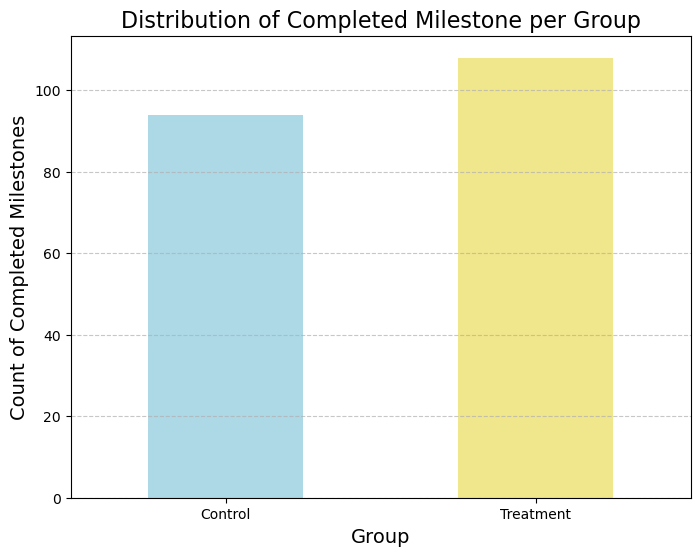

In [35]:
# Reload the dataset
file_path = "./data/Milestones - timesStandard-prod-Final.csv"
df = pd.read_csv(file_path)

# Define the columns of interest
columns_of_interest = ["issue", "problem", "folder", "file", "class", "method", "line", "solution", "implement"]

# Convert columns to numeric, forcing errors to NaN to exclude non-numeric values
df[columns_of_interest] = df[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Count the number of non-null numerical values in each column per group
df_counts = df.groupby("group")[columns_of_interest].apply(lambda x: x.notnull().sum())

# Sum across the selected columns for each group
df_counts["total"] = df_counts.sum(axis=1)

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df_counts["total"].plot(kind="bar", color=["lightblue", "khaki"])
plt.xlabel("Group", fontsize=14)
plt.ylabel("Count of Completed Milestones", fontsize=14)
plt.title("Distribution of Completed Milestone per Group", fontsize=16)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the plot
plt.savefig("./figures/completeness_distribution_plot.png", format="png")

# Show the plot
plt.show()
